Простой анализ данных в Pandas. Деревья решений, Random Forest

In [259]:
import numpy as np
import pandas
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
from pylab import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, f1_score

%matplotlib inline

http://pandas.pydata.org/pandas-docs/stable/10min.html

Для начала считаем данные и выведем их.

In [260]:
df = pandas.read_csv('titanic.csv', index_col='PassengerId')
df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


In [261]:
print(df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

[8 rows x 6 columns]


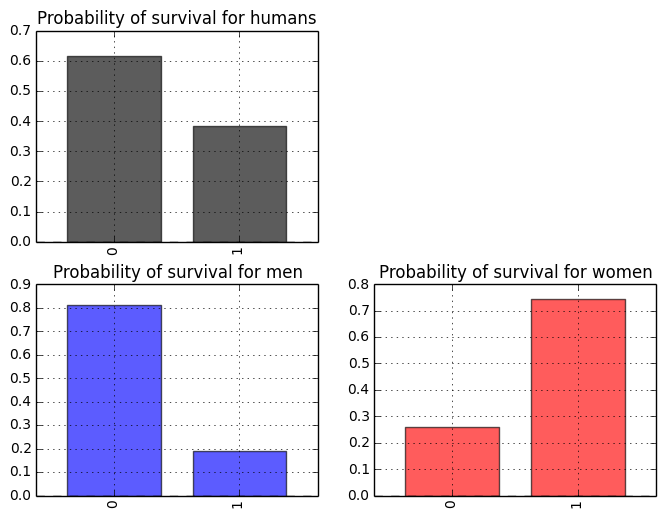

In [262]:
fig = figure(figsize = (8, 6))
a = 0.64

ax1 = fig.add_subplot(221)
df.Survived.value_counts(normalize=True, sort = False).plot(kind = 'bar', color = 'black', alpha = a)
plt.title('Probability of survival for humans')

ax2 = fig.add_subplot(223)
df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind = 'bar', color = 'b', alpha = a)
plt.title('Probability of survival for men')

ax3 = fig.add_subplot(224)
df.Survived[df.Sex == 'female'].value_counts(normalize=True, sort = False).plot(kind = 'bar', color = 'r', alpha = a)
plt.title('Probability of survival for women')

In [263]:
male_prob = df.Survived[df.Sex == 'male'].value_counts(normalize=True, sort = False)[1]
female_prob = df.Survived[df.Sex == 'female'].value_counts(normalize=True, sort = False)[1]
print "Вероятность выжить для мужчин состаляет {male_prob}, что меньше, чем для женщин {female_prob}.".format(
    male_prob=male_prob,
    female_prob=female_prob
)

Вероятность выжить для мужчин состаляет 0.188908145581, что меньше, чем для женщин 0.742038216561.


Построим, сколько людей ехало в каком классе.

([<matplotlib.patches.Wedge at 0x11933d790>,
  <matplotlib.text.Text at 0x118e56490>])

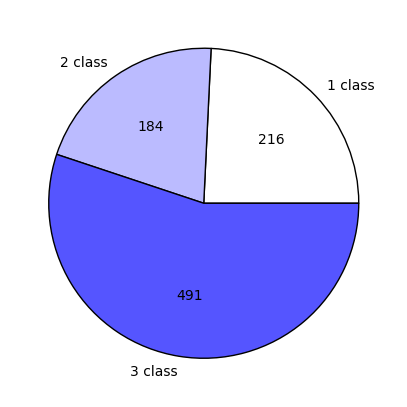

In [264]:
figure(figsize=(5, 5))
values = df['Pclass'].value_counts().sort_index()
pie(values, labels = ('1 class', '2 class', '3 class'), colors = ('#FFFFFF', '#BBBBFF', '#5555FF'), 
    autopct=lambda(p): '{:.0f}'.format(p * sum(values) / 100))

Определим вероятность выжить для пассажиров разных социально-экономических классов.

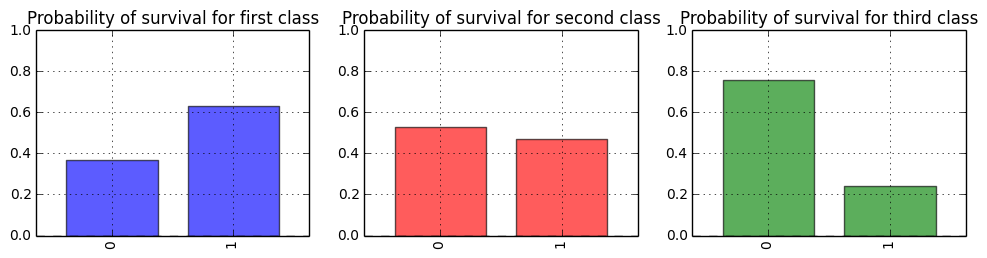

In [266]:
fig = plt.figure(figsize = (12, 9))
a = 0.64

ax1 = fig.add_subplot(331)
df.Survived[df.Pclass == 1].value_counts(normalize=True, sort=False).plot(kind = 'bar', color = 'b', alpha = a, ylim=[0, 1])
plt.title('Probability of survival for first class')

ax2 = fig.add_subplot(332)
df.Survived[df.Pclass == 2].value_counts(normalize=True, sort=False).plot(kind = 'bar', color = 'r', alpha = a, ylim=[0, 1])
plt.title('Probability of survival for second class')

ax3 = fig.add_subplot(333)
df.Survived[df.Pclass == 3].value_counts(normalize=True, sort=False).plot(kind = 'bar', color = 'g', alpha = a, ylim=[0, 1])
plt.title('Probability of survival for third class')

In [56]:
f_class = df.Survived[df.Pclass == 1].value_counts(normalize=True, sort = False)[1]
s_class = df.Survived[df.Pclass == 2].value_counts(normalize=True, sort = False)[1]
t_class = df.Survived[df.Pclass == 3].value_counts(normalize=True, sort = False)[1]
print ("Вероятность выжить для людей из третьего класса состаляет {t_class}, что меньше, чем для второго {s_class}, "
      "что в свою очередь меньше пернвого класса, для которого вероятность сотавляет {f_class}.").format(
    f_class=f_class,
    s_class=s_class,
    t_class=t_class,
)

Вероятность выжить для людей из третьего класса состаляет 0.242362525458, что меньше, чем для второго 0.472826086957, что в свою очередь меньше пернвого класса, для которого вероятность сотавляет 0.62962962963.


Посмотрим на распределение цен на билеты, и заодно узнаем, как оно соотносится с классом пасcажира.

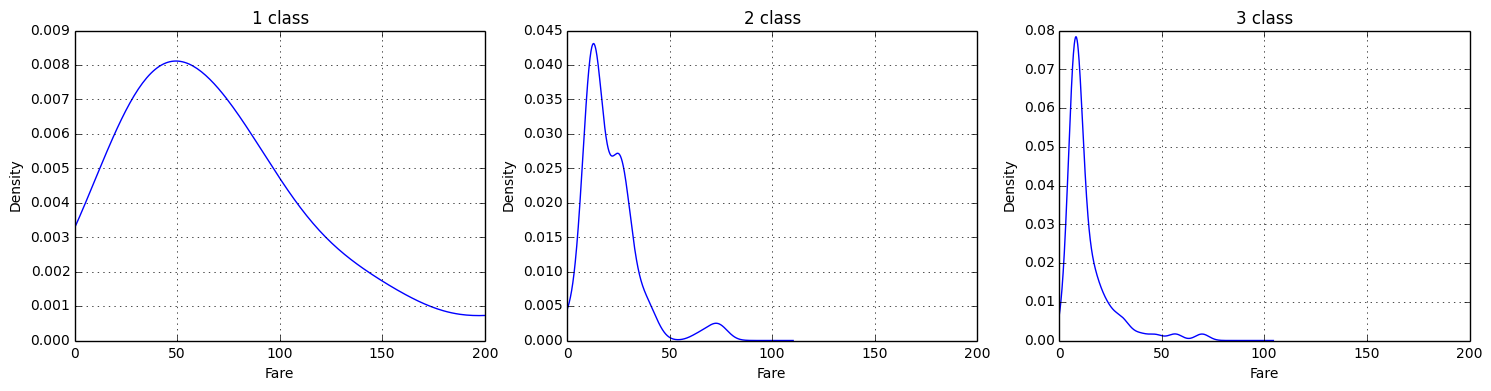

In [17]:
figure(figsize=(18, 4))

x = linspace(0, 200)
for i in range(3):
    subplot(1, 3, (i+1))
    df[df['Pclass'] == (i+1)]['Fare'].plot(kind = 'kde', label = str(i+1) + ' class')
    plt.title(str(i+1) + ' class')
    plt.xlabel('Fare')
    xlim([0,200])

Вероятность выжить женщине из 1 равна 0.968085106383
Вероятность выжить мужчине из 1 равна 0.368852459016
Вероятность выжить женщине из 2 равна 0.921052631579
Вероятность выжить мужчине из 2 равна 0.157407407407
Вероятность выжить женщине из 3 равна 0.5
Вероятность выжить мужчине из 3 равна 0.135446685879


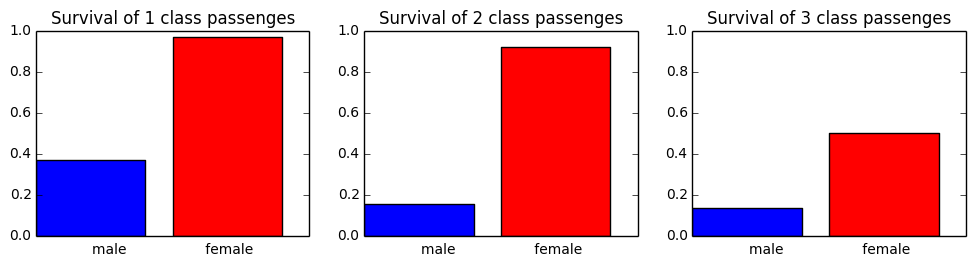

In [118]:
from itertools import product

fig = plt.figure(figsize = (12, 9))
a = 0.45

labels = product(['1st class', '2nd class', '3rd class'], ['female', 'male'])
labels = [' '.join(l) for l in labels]

for cls in (1, 2, 3):
    male_prob = float(df.Survived[df.Pclass == cls][df.Sex == 'male'].value_counts()[1]) / df.Survived[df.Pclass == cls][df.Sex == 'male'].value_counts().sum()
    female_prob = float(df.Survived[df.Pclass == cls][df.Sex == 'female'].value_counts()[1]) / df.Survived[df.Pclass == cls][df.Sex == 'female'].value_counts().sum()
    print("Вероятность выжить женщине из {} равна {}").format(cls, female_prob)
    print("Вероятность выжить мужчине из {} равна {}").format(cls, male_prob)
    fig.add_subplot(333 + cls)
    plt.bar((1, 2), [male_prob, female_prob], color=['b', 'r'])
    plt.title('Survival of {} class passenges'.format(cls))
    plt.tick_params(
        axis='x',          
        which='both',     
        bottom='off',      
        top='off',         
        labelbottom='off')
    axes = plt.gca()
    axes.set_ylim([0, 1])
    plt.xlabel('male                  female') 
    

$$ P("survived" and "female") = P("survived" | "female") \cdot P("female")$$

$$ P("female" and "1st\ class" and "survived") = P("survived" | "female" and "1st\ class") \cdot P("female" and "1st\ class")$$

## Деление выборки на training set & test set

In [161]:
df.Age.fillna(df.Age.median(), inplace=True)
df['Sex'] = df['Sex'].map({'female': 0, 'male':1}).astype(int)

df['Embarked_S'] = 0
df['Embarked_C'] = 0
df['Embarked_Q'] = 0
df['Embarked_unknown'] = 0

for index, row in df.iterrows():
    embark = row['Embarked']
    if embark == 'S':
        df.set_value(index,'Embarked_S',1)
    elif embark == 'C':
        df.set_value(index,'Embarked_C',1)
    elif embark == 'Q':
        df.set_value(index,'Embarked_Q',1)
    else:
        df.set_value(index,'Embarked_unknown',1)
        
df['Family_size'] = 0
for index, row in df.iterrows():
    df.set_value(index, 'Family_size', row['SibSp'] + row['Parch'] + 1)

df['is_alone'] = 0
for index, row in df.iterrows():
    if row['Family_size'] == 1:
        df.set_value(index, 'is_alone', 1)
    else:
        df.set_value(index, 'is_alone', 0)

x_labels = ['Pclass', 'Fare', 'Age', 'Sex', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Embarked_unknown', 'Family_size', 'is_alone']
X, y = df[x_labels], df['Survived']
X.head()

,Pclass,Fare,Age,Sex,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Family_size,is_alone
PassengerId,,,,,,,,,,
2,1,71.2833,38,0,0,1,0,0,2,0
4,1,53.1000,35,0,1,0,0,0,2,0
7,1,51.8625,54,1,1,0,0,0,1,1
11,3,16.7000,4,0,1,0,0,0,3,0
12,1,26.5500,58,0,1,0,0,0,1,1


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [163]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_test.describe()

((128, 10), (55, 10), (128,), (55,))


,Pclass,Fare,Age,Sex,Embarked_S,Embarked_C,Embarked_Q,Embarked_unknown,Family_size,is_alone
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55,55.000000,55.000000
mean,1.290909,69.387502,32.709091,0.418182,0.745455,0.236364,0.018182,0,2.018182,0.345455
std,0.657513,59.240863,15.599944,0.497807,0.439620,0.428764,0.134840,0,1.062682,0.479899
min,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0,1.000000,0.000000
25%,1.000000,26.468750,22.500000,0.000000,0.500000,0.000000,0.000000,0,1.000000,0.000000
50%,1.000000,57.979200,33.000000,0.000000,1.000000,0.000000,0.000000,0,2.000000,0.000000
75%,1.000000,82.508300,44.000000,1.000000,1.000000,0.000000,0.000000,0,2.000000,1.000000
max,3.000000,263.000000,63.000000,1.000000,1.000000,1.000000,1.000000,0,6.000000,1.000000


## Decision Tree

In [179]:
clf = DecisionTreeClassifier(min_samples_split=5)

In [180]:
clf.fit(np.array(X_train), np.array(y_train))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [181]:
importances = pandas.Series(clf.feature_importances_, index=x_labels)
print(importances)

Pclass              0.041954
Fare                0.174222
Age                 0.411306
Sex                 0.355528
Embarked_S          0.000000
Embarked_C          0.000000
Embarked_Q          0.000000
Embarked_unknown    0.000000
Family_size         0.016990
is_alone            0.000000
dtype: float64


In [182]:
y_pred = clf.predict(X_test)

In [183]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.36      0.56      0.43         9
          1       0.90      0.80      0.85        46

avg / total       0.81      0.76      0.78        55



Подберем параметры.
Вместо диаграм построим графики, так как они лучшн отображают поведение предсказатеоя при изменении параметра.

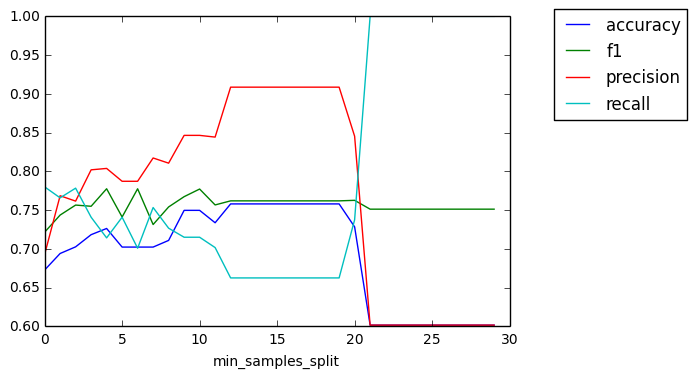

In [203]:
for scoring in ('accuracy', 'f1', 'precision', 'recall'):
    scores = []
    for min_samples_split in range(2, 151, 5):
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring=scoring))
        scores.append(score)
    plt.plot(range(len(scores)), scores, label=scoring)
plt.xlabel('min_samples_split')
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.show()

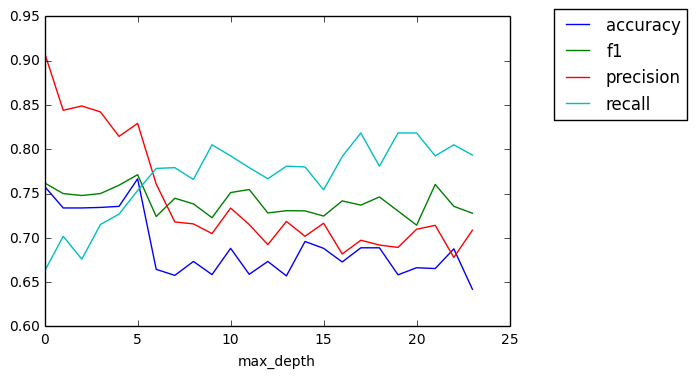

In [186]:
for scoring in ('accuracy', 'f1', 'precision', 'recall'):
    scores = []
    for max_depth in range(1, 25, 1):
        clf = DecisionTreeClassifier(max_depth=max_depth)
        score = np.mean(cross_val_score(clf, X_train, y_train, cv=5, scoring=scoring))
        scores.append(score)
    plt.plot(range(len(scores)), scores, label=scoring)
plt.xlabel('max_depth')
plt.legend(bbox_to_anchor=(1.4, 1.05))
plt.show()

Параметры max_depth и min_samples_split наиболее важны для решающего дерева: они отвечают за глубину и ширину дерева. Поэтому мы их и перебираем.

In [251]:
clf = DecisionTreeClassifier(min_samples_split=10, max_depth=3)
clf.fit(np.array(X_train), np.array(y_train))
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.45      1.00      0.62         9
          1       1.00      0.76      0.86        46

avg / total       0.91      0.80      0.82        55



Как видим, качество после подбора параметров увеличилось

Отобразим лучшее решающее дерево.

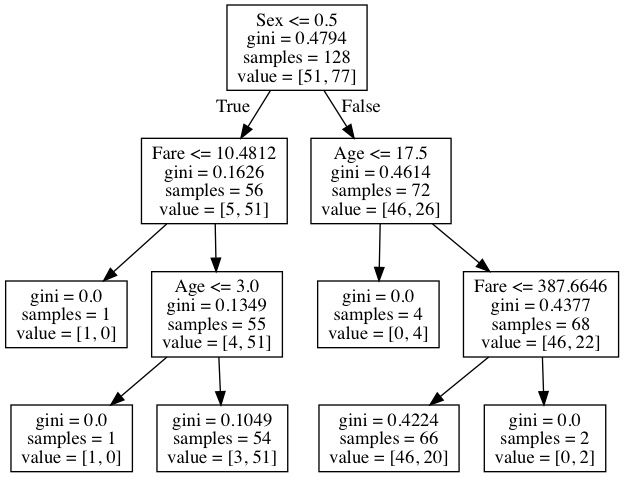

In [254]:
from IPython.display import Image 
from StringIO import StringIO
from IPython.display import Image
export_graphviz(clf, out_file='tree.dot', feature_names=x_labels)
!dot -Tpng tree.dot -o tree.png
from IPython.display import Image
Image('tree.png')

## Random Forest ##

In [190]:
model = RandomForestClassifier(n_estimators = 100)

In [191]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.53      0.89      0.67         9
          1       0.97      0.85      0.91        46

avg / total       0.90      0.85      0.87        55



In [206]:
scores = []
for t in range(1,500, 20):
    rfc = RandomForestClassifier(n_estimators=t)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

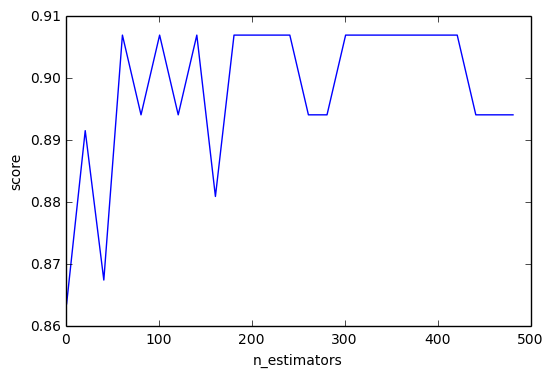

In [207]:
plt.plot(range(1,500, 20), scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Из графика делаем вывод, что подходящим количеством деревьев будет 400 штук.

In [215]:
model = RandomForestClassifier(n_estimators = 400)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.53      0.89      0.67         9
          1       0.97      0.85      0.91        46

avg / total       0.90      0.85      0.87        55



Как видим, значение не изменилось от 100 деревьев. Значит и 100 было достаточно.

Сравнивая решающее дерево и random forest делаемы вывод, что по совокупности метрик выигрывает random forest, хотя в метрике precision решающее дерево немного обогнало random forest.